In [10]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# 原始数据集目录
source_dataset_dir =  "C:/Users/Sabrinabi/Desktop/tester01"
# 目标数据集目录
target_dataset_dir = "C:/Users/Sabrinabi/Desktop/taster01"

# 创建目标目录结构
os.makedirs(os.path.join(target_dataset_dir, "train", "normal"), exist_ok=True)
os.makedirs(os.path.join(target_dataset_dir, "train", "cataract"), exist_ok=True)
os.makedirs(os.path.join(target_dataset_dir, "train", "surgery"), exist_ok=True)

os.makedirs(os.path.join(target_dataset_dir, "validation", "normal"), exist_ok=True)
os.makedirs(os.path.join(target_dataset_dir, "validation", "cataract"), exist_ok=True)
os.makedirs(os.path.join(target_dataset_dir, "validation", "surgery"), exist_ok=True)

os.makedirs(os.path.join(target_dataset_dir, "test", "normal"), exist_ok=True)
os.makedirs(os.path.join(target_dataset_dir, "test", "cataract"), exist_ok=True)
os.makedirs(os.path.join(target_dataset_dir, "test", "surgery"), exist_ok=True)

# 划分数据集
for category in ["normal", "cataract", "surgery"]:
    source_category_dir = os.path.join(source_dataset_dir, category)
    target_train_category_dir = os.path.join(target_dataset_dir, "train", category)
    target_validation_category_dir = os.path.join(target_dataset_dir, "validation", category)
    target_test_category_dir = os.path.join(target_dataset_dir, "test", category)

    # 获取所有图像文件
    image_files = os.listdir(source_category_dir)

    # 计算划分数量
    num_images = len(image_files)
    num_train = int(0.7 * num_images)
    num_validation = int(0.15 * num_images)
    num_test = num_images - num_train - num_validation

    # 随机洗牌图像文件
    random.shuffle(image_files)

    # 将图像移动到目标目录
    for i, image_file in enumerate(image_files):
        source_image_path = os.path.join(source_category_dir, image_file)
        if i < num_train:
            target_image_path = os.path.join(target_train_category_dir, image_file)
        elif i < num_train + num_validation:
            target_image_path = os.path.join(target_validation_category_dir, image_file)
        else:
            target_image_path = os.path.join(target_test_category_dir, image_file)
        shutil.copy(source_image_path, target_image_path)

# 打印划分后各个数据集的数量
print("Train - Normal:", len(os.listdir(os.path.join(target_dataset_dir, "train", "normal"))))
print("Train - Cataract:", len(os.listdir(os.path.join(target_dataset_dir, "train", "cataract"))))
print("Train - Surgery:", len(os.listdir(os.path.join(target_dataset_dir, "train", "surgery"))))

print("Validation - Normal:", len(os.listdir(os.path.join(target_dataset_dir, "validation", "normal"))))
print("Validation - Cataract:", len(os.listdir(os.path.join(target_dataset_dir, "validation", "cataract"))))
print("Validation - Surgery:", len(os.listdir(os.path.join(target_dataset_dir, "validation", "surgery"))))

print("Test - Normal:", len(os.listdir(os.path.join(target_dataset_dir, "test", "normal"))))
print("Test - Cataract:", len(os.listdir(os.path.join(target_dataset_dir, "test", "cataract"))))
print("Test - Surgery:", len(os.listdir(os.path.join(target_dataset_dir, "test", "surgery"))))

Train - Normal: 543
Train - Cataract: 800
Train - Surgery: 800
Validation - Normal: 116
Validation - Cataract: 171
Validation - Surgery: 171
Test - Normal: 117
Test - Cataract: 173
Test - Surgery: 173


In [11]:
train_data_dir = "C:/Users/Sabrinabi/Desktop/taster01/train"
val_data_dir = "C:/Users/Sabrinabi/Desktop/taster01/validation"
test_data_dir = "C:/Users/Sabrinabi/Desktop/taster01/test"

# 数据增强和预处理
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')


Found 2143 images belonging to 3 classes.
Found 458 images belonging to 3 classes.


In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/10
67/67 [==============================] - 76s 1s/step - loss: 0.8583 - accuracy: 0.5646 - val_loss: 0.5255 - val_accuracy: 0.6288
Epoch 2/10
67/67 [==============================] - 75s 1s/step - loss: 0.6112 - accuracy: 0.7126 - val_loss: 0.4196 - val_accuracy: 0.8493
Epoch 3/10
67/67 [==============================] - 77s 1s/step - loss: 0.4700 - accuracy: 0.7956 - val_loss: 0.3314 - val_accuracy: 0.8886
Epoch 4/10
67/67 [==============================] - 73s 1s/step - loss: 0.4014 - accuracy: 0.8455 - val_loss: 0.1868 - val_accuracy: 0.9476
Epoch 5/10
67/67 [==============================] - 74s 1s/step - loss: 0.3811 - accuracy: 0.8497 - val_loss: 0.3533 - val_accuracy: 0.8515
Epoch 6/10
67/67 [==============================] - 73s 1s/step - loss: 0.3208 - accuracy: 0.8768 - val_loss: 0.1551 - val_accuracy: 0.9498
Epoch 7/10
67/67 [==============================] - 77s 1s/step - loss: 0.2900 - accuracy: 0.8983 - val_loss: 0.1129 - val_accuracy: 0.9672
Epoch 8/10
67/67 [==

Found 463 images belonging to 3 classes.
15/15 [==============================] - 3s 206ms/step - loss: 0.1742 - accuracy: 0.9568
Test accuracy: 0.9568034410476685


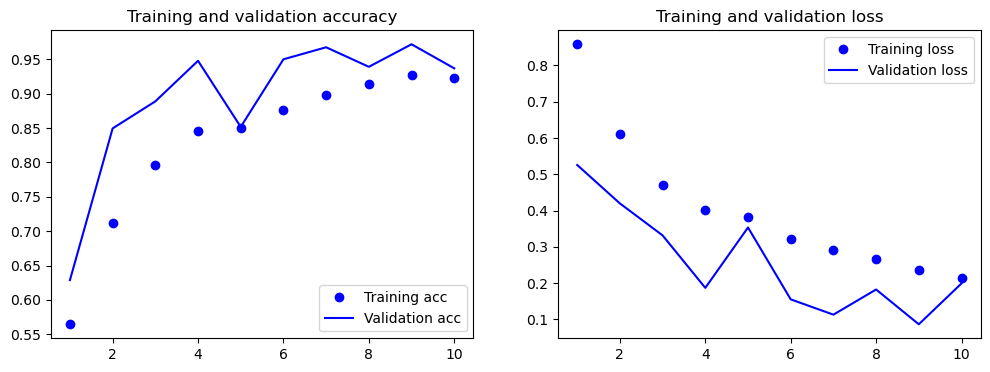

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator)

print(f'Test accuracy: {test_acc}')

# 可视化训练过程
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
# 保存模型到文件
model.save('my_model.keras')

In [17]:
import shutil
import os

# 源模型文件路径
model_source_path = "my_model.keras"

# 桌面目标路径
desktop_path = os.path.expanduser("~")

# 在桌面创建一个目标文件夹，如果它不存在的话
target_folder = os.path.join(desktop_path, "saved_models")
os.makedirs(target_folder, exist_ok=True)

# 复制模型文件到桌面
shutil.copy(model_source_path, os.path.join(target_folder, "my_model.keras"))

print("Model has been copied to the desktop.")


Model has been copied to the desktop.


In [18]:
from tensorflow.keras.models import load_model

In [20]:
model = load_model('C:/Users/Sabrinabi/saved_models/my_model.keras')

In [34]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 替换 'path_to_your_image.jpg' 为您要评估的图像路径
image_path = r'C:\Users\Sabrinabi\Desktop\屏幕截图 2023-10-15 200237.png'

# 加载图像
img = load_img(image_path, target_size=(224, 224))

# 将图像转换为Numpy数组并进行像素值缩放
img_array = img_to_array(img)
img_array = img_array / 255.0  # 进行像素值缩放

# 添加批次维度
img_array = img_array.reshape((1, 224, 224, 3))

# 现在可以使用 img_array 作为输入数据进行模型预测
predictions = model.predict(img_array)

# 输出预测结果
predicted_class = np.argmax(predictions)
print(f"Predicted class: {predicted_class}")



1/1 [==============================] - 0s 27ms/step
Predicted class: 1


In [35]:
# 获取预测结果中概率最高的类别
predicted_class = np.argmax(predictions)

# 输出预测结果
if predicted_class == 0:
    print("预测结果：正常眼睛")
elif predicted_class == 1:
    print("预测结果：白内障")
elif predicted_class == 2:
    print("预测结果：术后眼睛")

预测结果：白内障


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [38]:
# 获取测试集的真实标签
test_generator = val_datagen.flow_from_directory(test_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)
y_true = test_generator.classes 
y_pred = model.predict(test_generator)  
y_pred = np.argmax(y_pred, axis=1)  



Found 463 images belonging to 3 classes.
15/15 [==============================] - 4s 229ms/step


In [39]:
confusion_mtx = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred, target_names=['Normal', 'Cataract', 'Surgery'])


In [43]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


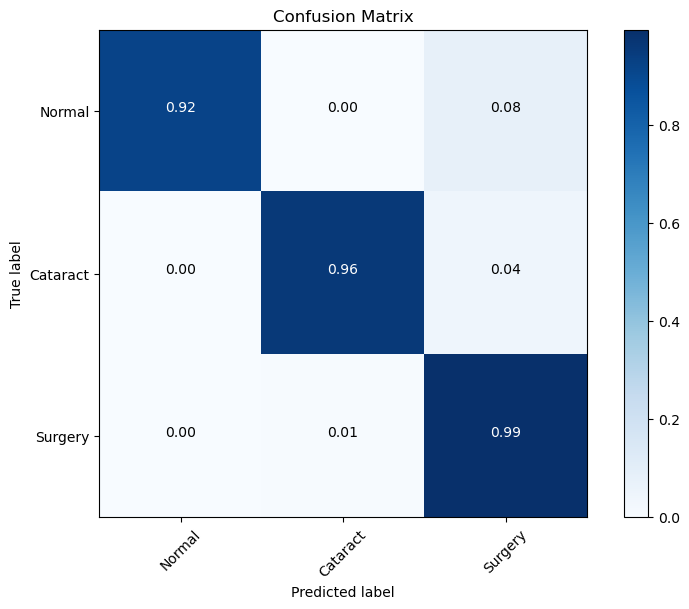

              precision    recall  f1-score   support

      Normal       1.00      0.92      0.96       173
    Cataract       0.99      0.96      0.97       117
     Surgery       0.90      0.99      0.95       173

    accuracy                           0.96       463
   macro avg       0.96      0.96      0.96       463
weighted avg       0.96      0.96      0.96       463



In [44]:
class_names = ['Normal', 'Cataract', 'Surgery'] 

plot_confusion_matrix(confusion_mtx, classes=class_names, title='Confusion Matrix', normalize=True)  
plt.show()

print(classification_rep)